In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [23]:
# Load dataset
df = pd.read_csv("Twitter_Data.csv")

In [22]:
# Map category values to labels
sentiment_map = {-1.0: 'Negative', 0.0: 'Neutral', 1.0: 'Positive'}
df['sentiment'] = df['category'].map(sentiment_map)

# Check data
print("Dataset shape:", df.shape)
print(df.head())

Dataset shape: (162980, 3)
                                          clean_text  category sentiment
0  when modi promised “minimum government maximum...      -1.0  Negative
1  talk all the nonsense and continue all the dra...       0.0   Neutral
2  what did just say vote for modi  welcome bjp t...       1.0  Positive
3  asking his supporters prefix chowkidar their n...       1.0  Positive
4  answer who among these the most powerful world...       1.0  Positive


In [25]:
# Map numeric sentiment to labels
sentiment_map = {-1.0: 'Negative', 0.0: 'Neutral', 1.0: 'Positive'}
df['sentiment'] = df['category'].map(sentiment_map)

print(df[['clean_text', 'category', 'sentiment']].head())

                                          clean_text  category sentiment
0  when modi promised “minimum government maximum...      -1.0  Negative
1  talk all the nonsense and continue all the dra...       0.0   Neutral
2  what did just say vote for modi  welcome bjp t...       1.0  Positive
3  asking his supporters prefix chowkidar their n...       1.0  Positive
4  answer who among these the most powerful world...       1.0  Positive


C:\Users\sneha\AppData\Local\Temp\ipykernel_17144\2254098333.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment', order=df['sentiment'].value_counts().index, palette="Set2")


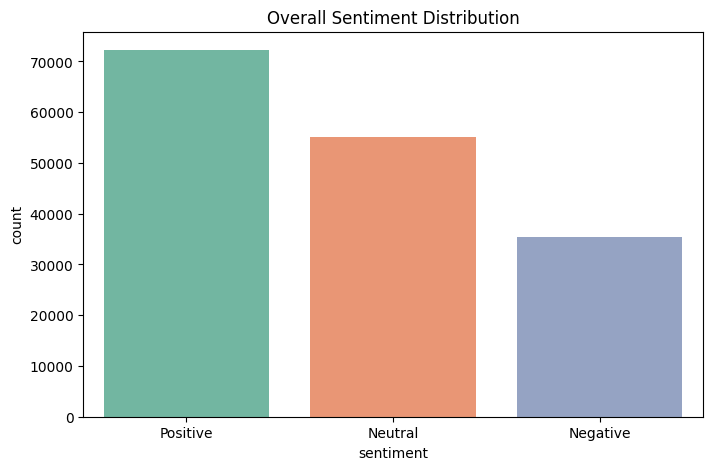

In [26]:
# Sentiment Distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.countplot(data=df, x='sentiment', order=df['sentiment'].value_counts().index, palette="Set2")
plt.title("Overall Sentiment Distribution")
plt.show()

In [32]:
# ---- Word Clouds ----
positive_text = " ".join(df[df['sentiment'] == 'Positive']['clean_text'].astype(str))
negative_text = " ".join(df[df['sentiment'] == 'Negative']['clean_text'].astype(str))

In [33]:
# Preview cleaned data
df.head()

,clean_text,category,sentiment
0,when modi promised “minimum government maximum...,-1.0,Negative
1,talk all the nonsense and continue all the dra...,0.0,Neutral
2,what did just say vote for modi welcome bjp t...,1.0,Positive
3,asking his supporters prefix chowkidar their n...,1.0,Positive
4,answer who among these the most powerful world...,1.0,Positive


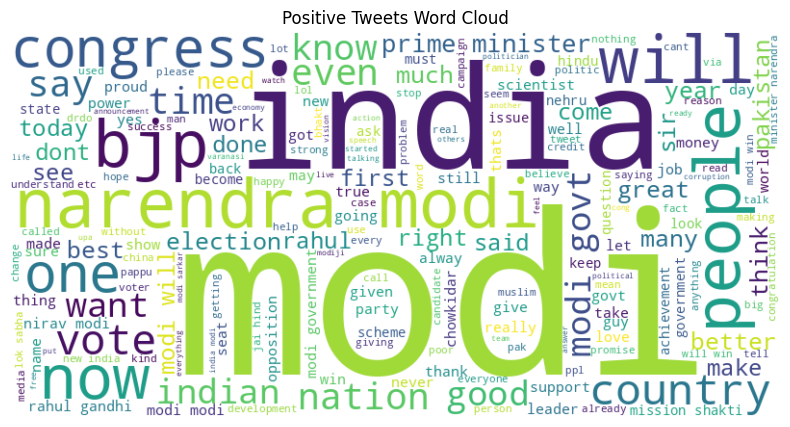

In [34]:
# Positive word clou
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title("Positive Tweets Word Cloud")
plt.show()


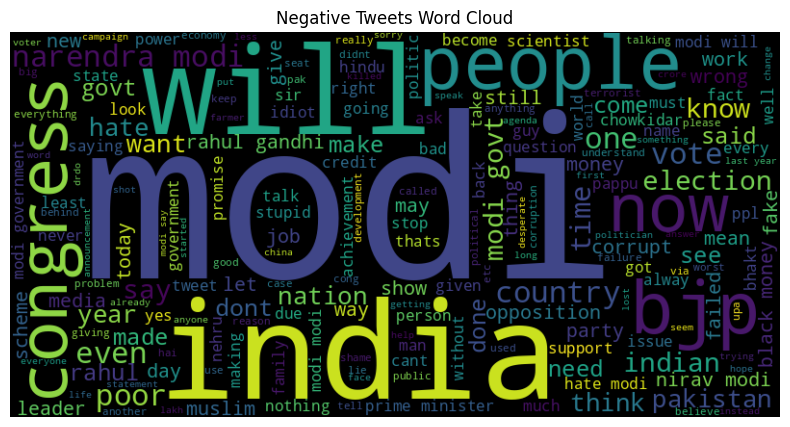

In [35]:
# Negative word cloud
wordcloud_neg = WordCloud(width=800, height=400, background_color='black').generate(negative_text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title("Negative Tweets Word Cloud")
plt.show()

In [36]:
# ---- Final Sentiment Report ----
total = len(df)
report = df['sentiment'].value_counts(normalize=True) * 100

print("--- Brand Sentiment Report ---")
for sentiment, percent in report.items():
    print(f"{sentiment}: {percent:.2f}%")

if report.get('Positive', 0) > report.get('Negative', 0):
    print("\nOverall brand perception is POSITIVE.")
else:
    print("\nOverall brand perception is NEGATIVE. Recommend actions to improve brand image.")

--- Brand Sentiment Report ---
Positive: 44.33%
Neutral: 33.88%
Negative: 21.79%

Overall brand perception is POSITIVE.


In [20]:
# Save final analyzed dataset
df.to_csv("Twitter_Sentiment_Analyzed.csv", index=False)

# Example: Count of sentiments
sentiment_counts = df["predicted_sentiment"].value_counts()
print("Sentiment Summary:")
print(sentiment_counts)

Sentiment Summary:
predicted_sentiment
Positive    66532
Neutral     66062
Negative    30375
Name: count, dtype: int64
